This notebook munges the AUC values for the Tumor vs. Normal prediction task and makes several visualizations.

In [7]:
import getpass
import sys
import time

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
%matplotlib inline

In [9]:
mpl.rcParams['figure.dpi'] = 200

In [10]:
print(getpass.getuser())

sarah


In [11]:
print(sys.version)

3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]


In [12]:
print(time.asctime())

Tue May 14 21:56:49 2019


In [2]:
df = pd.read_csv('../../input/tumor_prediction_results.tsv', sep='\t')
df = df.sort_values(['Database', 'Dataset'])
df.head()

,Database,Dataset,AUC
40,KEGG,BRCA,0.990240
41,KEGG,BRCA,0.993994
42,KEGG,BRCA,1.000000
43,KEGG,BRCA,1.000000
44,KEGG,BRCA,0.995041


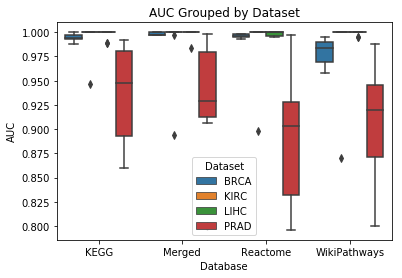

In [3]:
sns.boxplot(
    y='AUC',
    x='Database',
    hue='Dataset',
    data=df
)
plt.title('AUC Grouped by Dataset')
plt.show()

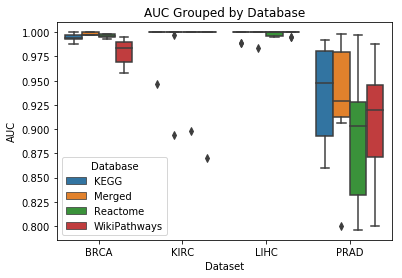

In [4]:
sns.boxplot(
    y='AUC',
    x='Dataset',
    hue='Database',
    data=df
)
plt.title('AUC Grouped by Database')
plt.show()

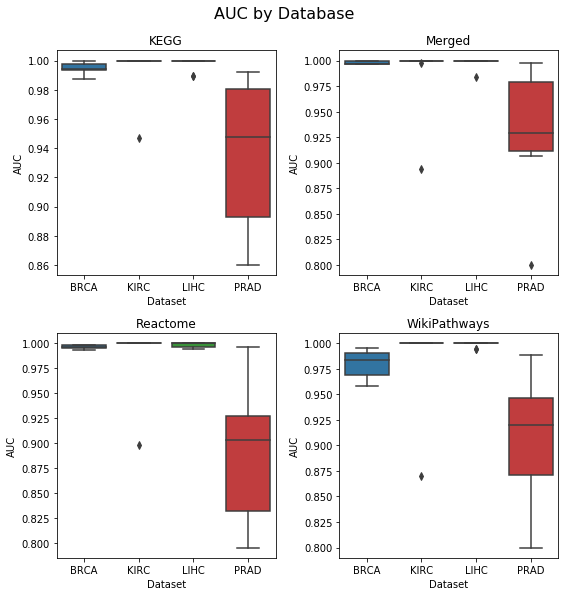

In [5]:
ncols = 2
nrows = df['Database'].nunique() // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))

plt.suptitle('AUC by Database', fontsize=16, y=1.03)

y_min = df['AUC'].min()

for database, ax in zip(df['Database'].unique(), axes.ravel()):
    ax.set_title(database)
    # Use this to make the y-axes all use the same, but makes readability difficult
    # ax.set_ylim(bottom=y_min, top=1.0)  
    sns.boxplot(
        y='AUC',
        x='Dataset',
        data=df[df['Database'] == database],
        ax=ax,
    )

plt.tight_layout()
plt.show()

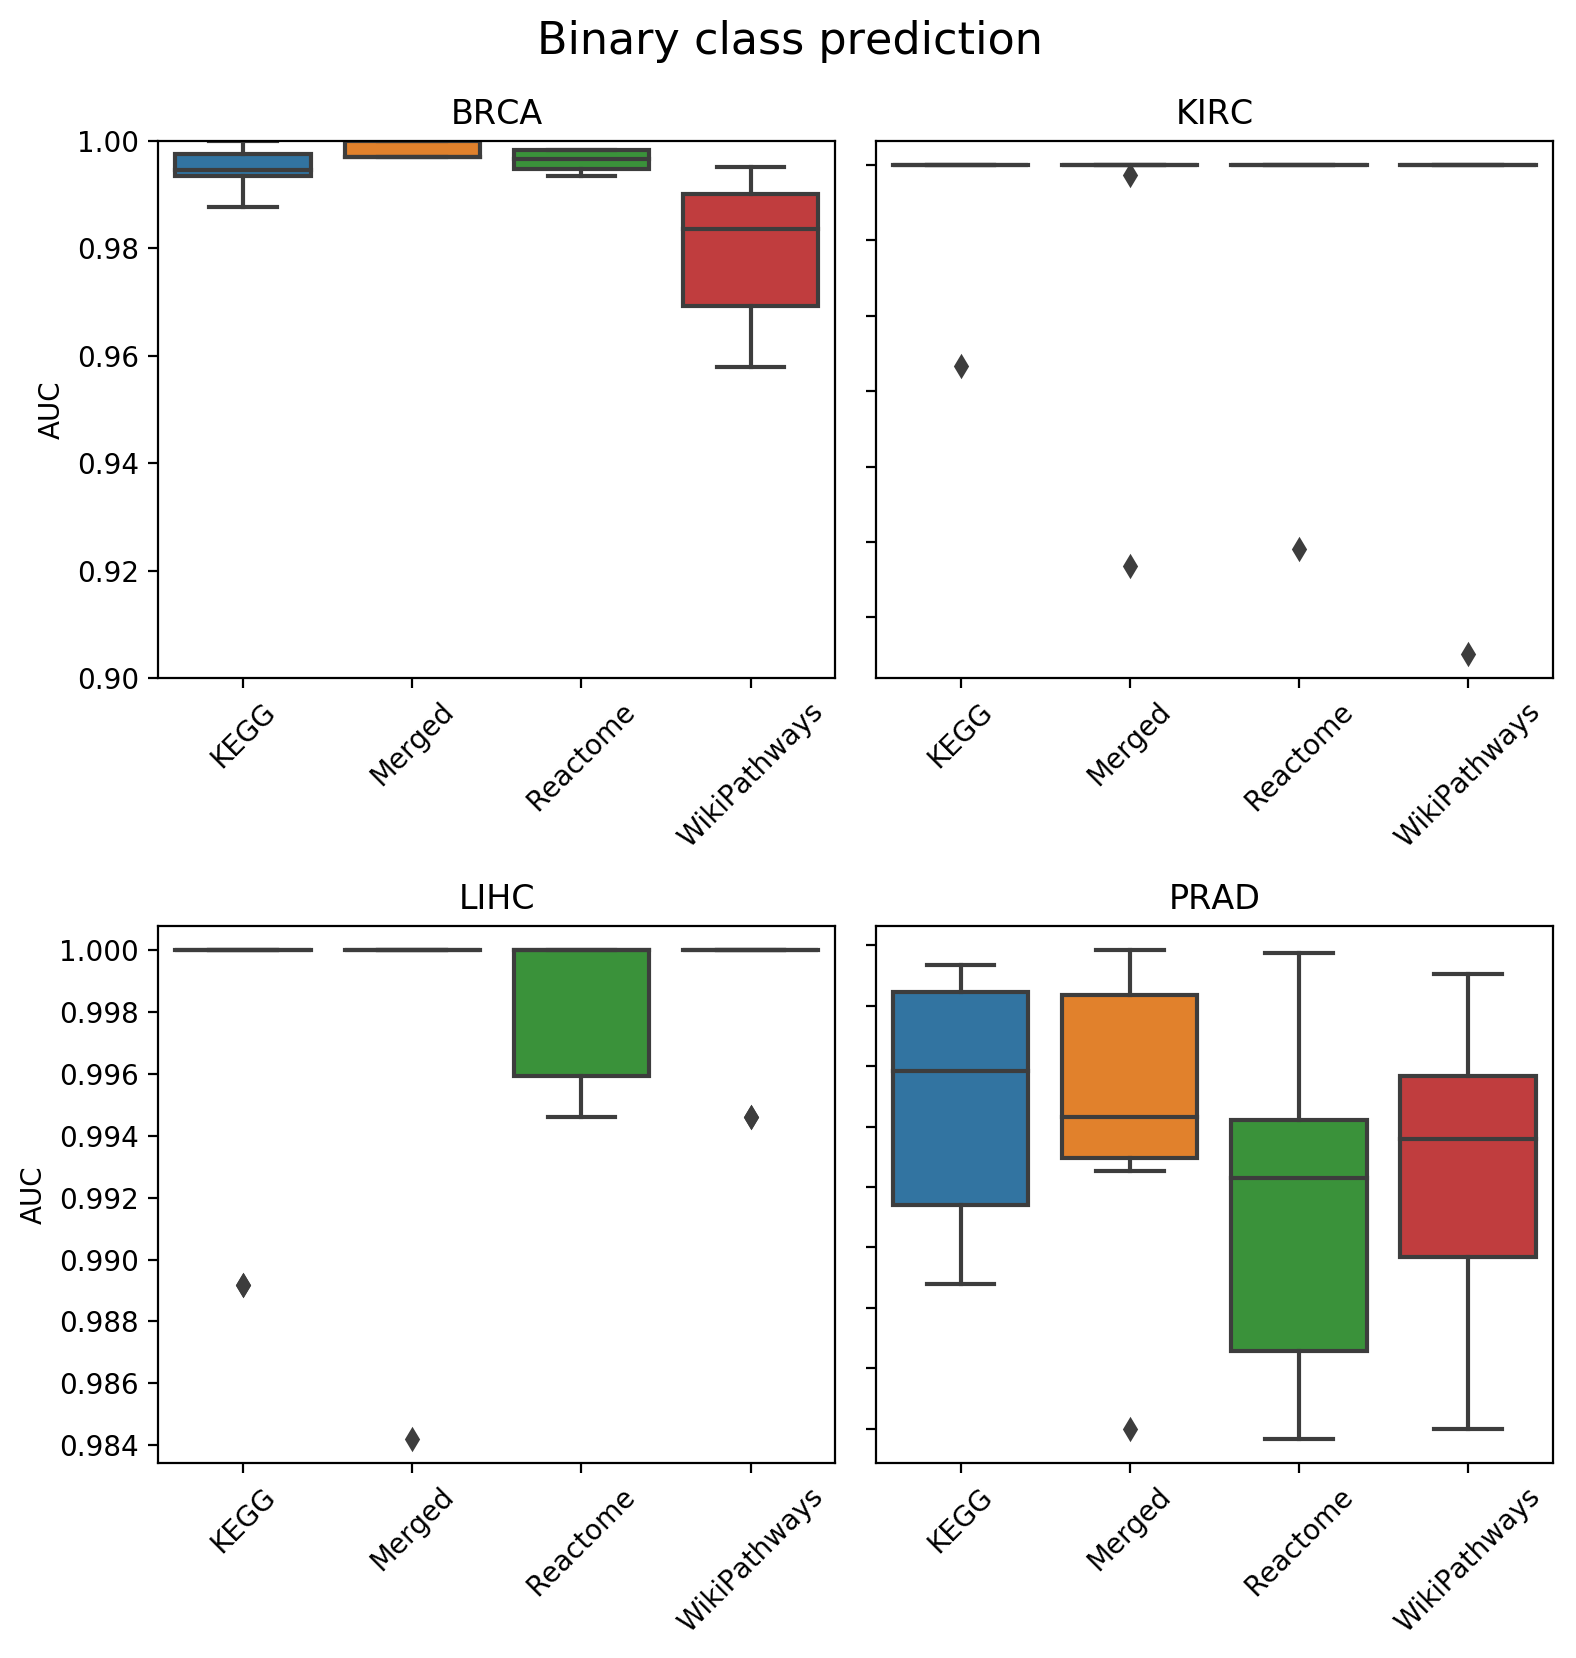

In [14]:
ncols = 2
nrows = df['Dataset'].nunique() // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))

plt.suptitle('Binary class prediction', fontsize=16, y=1.03)

for plot_num, (dataset, ax) in enumerate(zip(df['Dataset'].unique(), axes.ravel())):
    ax.set_title(dataset)
    # Use this to make the y-axes all use the same, but makes readability difficult
    if dataset == 'BRCA':
        ax.set_ylim(bottom=0.9, top=1.0)  
    sns.boxplot(
        y='AUC',
        x='Database',
        data=df[df['Dataset'] == dataset],
        ax=ax,
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    # Hide x label in all plots and leave y axis label for the leftmost plots
    ax.set_xlabel('')
    if plot_num in {1,3}:
        ax.set_ylabel('')
        ax.tick_params(labelleft=False) 

plt.tight_layout()
plt.show()